In [9]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from onix.units import ureg
from datetime import datetime

In [10]:
data = {
    "date": np.array([]),
    "temperature": np.array([]),
    "humidity": np.array([]),
    "pressure": np.array([]),
}

In [11]:
def read_new_data(file):
    """
    Read a new file's worth of data into the data dictionary. Saves us from re-reading the same files every time we add a new file.
    """
    file_data = np.genfromtxt(file, delimiter = ",", dtype = None, encoding = 'utf-8', usecols = [0,1,2,3])
    file_date = file_data[:,0][1:],
    file_temperature = file_data[:,1][1:].astype(float) * ureg.degC
    file_humidity = file_data[:,2][1:].astype(float) # in percent
    file_pressure = file_data[:,3][1:].astype(float) * ureg.hPa
    data["date"] = np.append(data["date"], file_date)
    data["temperature"] = np.append(data["temperature"], file_temperature)
    data["humidity"] = np.append(data["humidity"], file_humidity)
    data["pressure"] = np.append(data["pressure"], file_pressure)

In [12]:
#filepath_1 = r'C:\Users\onix\Downloads\Ruuvi EBAC_20240524T121005-0400.csv' # from Bassam's phone
filepath = r'C:\Users\onix\Downloads\Ruuvi EBAC_20240524T121540-0400.csv' # from Alek's phone

In [13]:
read_new_data(filepath)

C:\Users\onix\.venv\vlab\lib\site-packages\matplotlib\cbook\__init__.py:1340: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


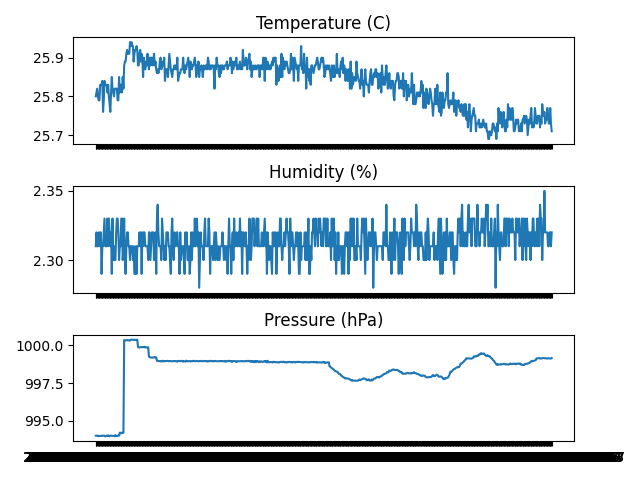

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True)
ax1.plot(data["temperature"])
ax1.set_title("Temperature (C)")
ax2.plot(data["humidity"])
ax2.set_title("Humidity (%)")
ax3.plot(data["date"], data["pressure"])
ax3.set_title("Pressure (hPa)")

plt.tight_layout()
plt.show()